In [1]:
import pandas as pd

In [2]:
file_path = "./df_all_years_clean.csv"  # Update the path if needed
df = pd.read_csv(file_path)

df.head()

,Year,Name,Department,Job Title,Total Cash Compensation,Base Pay,Overtime,Sick and Vacation Payouts,Other Cash Compensation,Defined Contribution Plan Contributions - City Paid,Medical Dental Vision,Retirement Contributions (Normal Cost) - City Paid,"Long Term Disability, Life, Medicare",Misc Employment Related Costs
0,2013,"Bustillos,Steven D",Police,Police Sergeant,286137.69,90888.00,89867.88,97969.79,7412.02,NaN,13640.50,74429.71,NaN,NaN
1,2013,"Figone,Debra J",City Manager,City Manager U,248564.84,227975.02,NaN,NaN,20589.82,NaN,15166.00,131032.44,NaN,NaN
2,2013,"Guerra,Daniel P",Police,Police Officer,241039.12,97198.40,132104.54,NaN,11736.18,NaN,15371.56,79821.51,NaN,NaN
3,2013,"Moore,Christopher M",Police,Chief Of Police U,233540.32,15319.54,NaN,215470.80,2749.98,NaN,1371.81,11204.16,NaN,NaN
4,2013,"Vasquez,Hector M",Police,Police Officer,230469.85,97198.40,124552.69,NaN,8718.76,NaN,16345.32,79821.51,NaN,NaN


In [14]:
inflation_rate_df = pd.DataFrame({
    'Year': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Inflation Rate (%)': [1.5, 0.8, 0.7, 2.1, 2.1, 1.9, 2.3, 1.4, 7.0, 6.5, 3.4]
})

df = df.merge(inflation_rate_df, on='Year', how='left')

df['Adjusted Compensation'] = df['Total Compensation'] / (1 + df['Inflation Rate (%)'] / 100)

In [15]:
df['Compensation Growth (%)'] = df.groupby('Job Title')['Adjusted Compensation'].pct_change() * 100

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

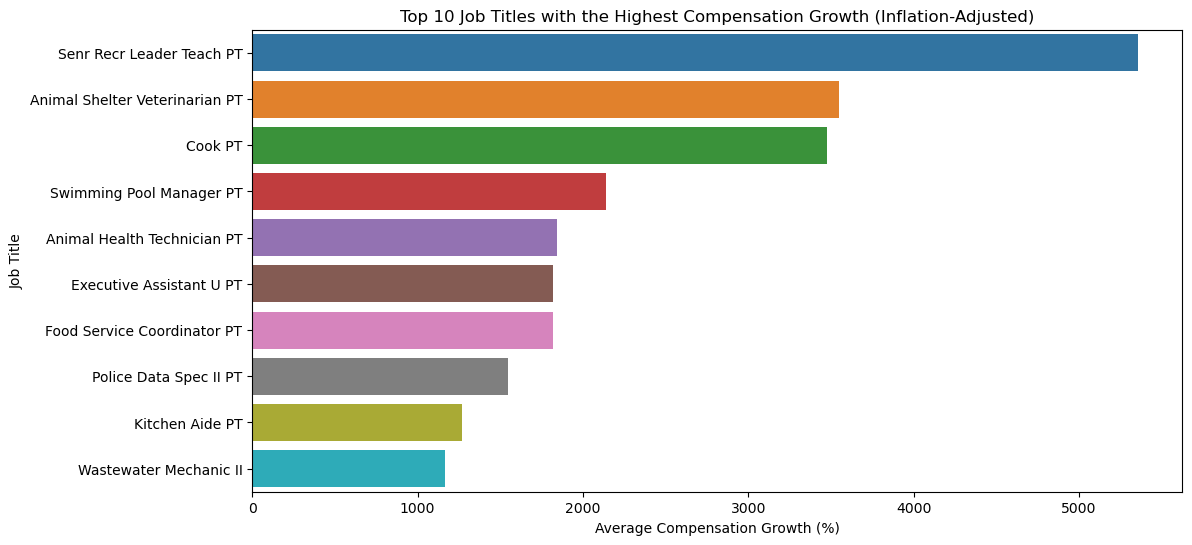

In [18]:
avg_growth = df.groupby('Job Title')['Compensation Growth (%)'].mean().sort_values(ascending=False).head(10)

# Plot top 10 job titles
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_growth.values, y=avg_growth.index, hue=avg_growth.index)
plt.title('Top 10 Job Titles with the Highest Compensation Growth (Inflation-Adjusted)')
plt.xlabel('Average Compensation Growth (%)')
plt.ylabel('Job Title')
plt.show()

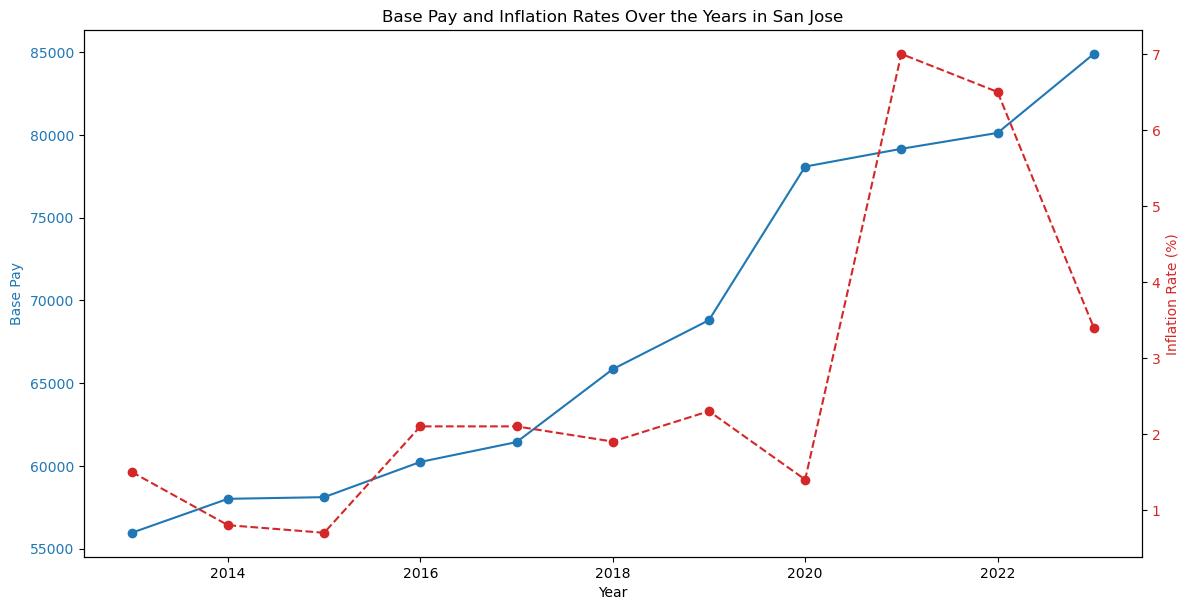

In [ ]:
yearly_stats = df.groupby('Year').agg({'Base Pay': 'mean', 'Inflation Rate (%)': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Base Pay', color='tab:blue')
ax1.plot(yearly_stats['Year'], yearly_stats['Base Pay'], marker='o', label='Base Pay', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Inflation Rate (%)', color='tab:red')
ax2.plot(yearly_stats['Year'], yearly_stats['Inflation Rate (%)'], marker='o', linestyle='--', label='Inflation Rate', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Base Pay and Inflation Rates Over the Years in San Jose')
plt.show()

# Research Question 3

In [40]:
fire_dept = df[df['Department'] == 'Fire']
parks_rec = df[df['Department'] == 'Parks/Rec & Neigh Serv P R N S']
library = df[df['Department'] == 'Library']

/var/folders/fd/3bl_2gw53px8fzkn9hzfjt8c0000gn/T/ipykernel_11978/2236990323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_dept['Period'] = fire_dept['Year'].apply(lambda x: 'Pre-2019' if x < 2019 else 'Post-2019')


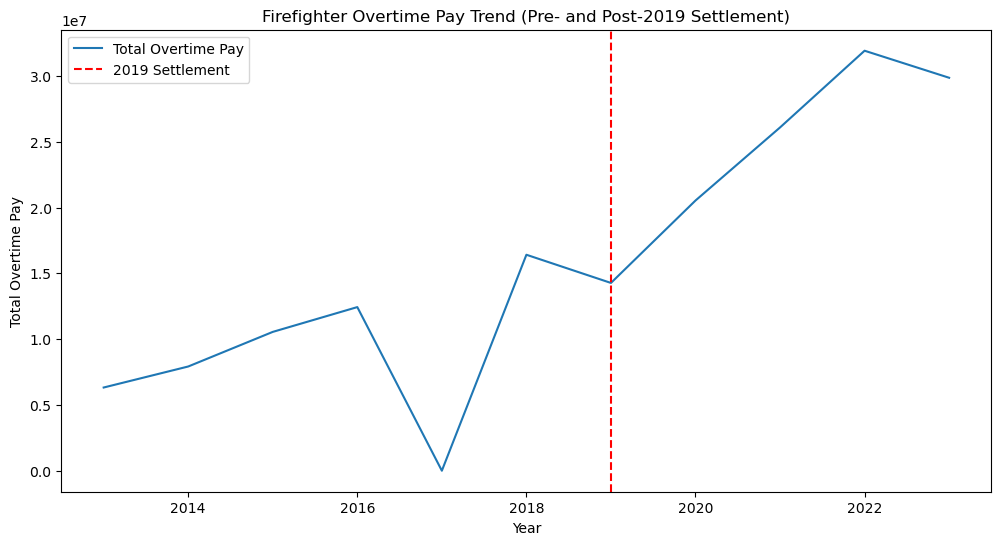

In [ ]:
fire_dept['Period'] = fire_dept['Year'].apply(lambda x: 'Pre-2019' if x < 2019 else 'Post-2019')
overtime_trend = fire_dept.groupby(['Year']).agg({'Overtime': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=overtime_trend, x='Year', y='Overtime', label='Total Overtime Pay')
plt.axvline(2019, color='red', linestyle='--', label='2019 Settlement')
plt.title('Firefighter Overtime Pay Trend (Pre- and Post-2019 Settlement)')
plt.xlabel('Year')
plt.ylabel('Total Overtime Pay')
plt.legend()
plt.show()

In [ ]:
import numpy as np

/var/folders/fd/3bl_2gw53px8fzkn9hzfjt8c0000gn/T/ipykernel_11978/3742013661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_dept['Overtime Pay Z-Score'] = (fire_dept['Overtime'] - fire_dept['Overtime'].mean()) / fire_dept['Overtime'].std()


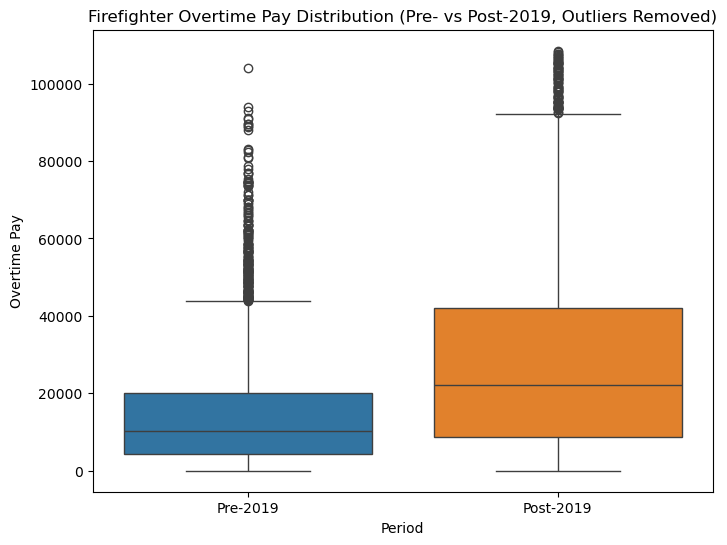

In [ ]:
fire_dept['Overtime Pay Z-Score'] = (fire_dept['Overtime'] - fire_dept['Overtime'].mean()) / fire_dept['Overtime'].std()

filtered_fire_dept = fire_dept[fire_dept['Overtime Pay Z-Score'].abs() <= 3]

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_fire_dept, x='Period', y='Overtime', hue='Period')
plt.title('Firefighter Overtime Pay Distribution (Pre- vs Post-2019, Outliers Removed)')
plt.xlabel('Period')
plt.ylabel('Overtime Pay')
plt.show()

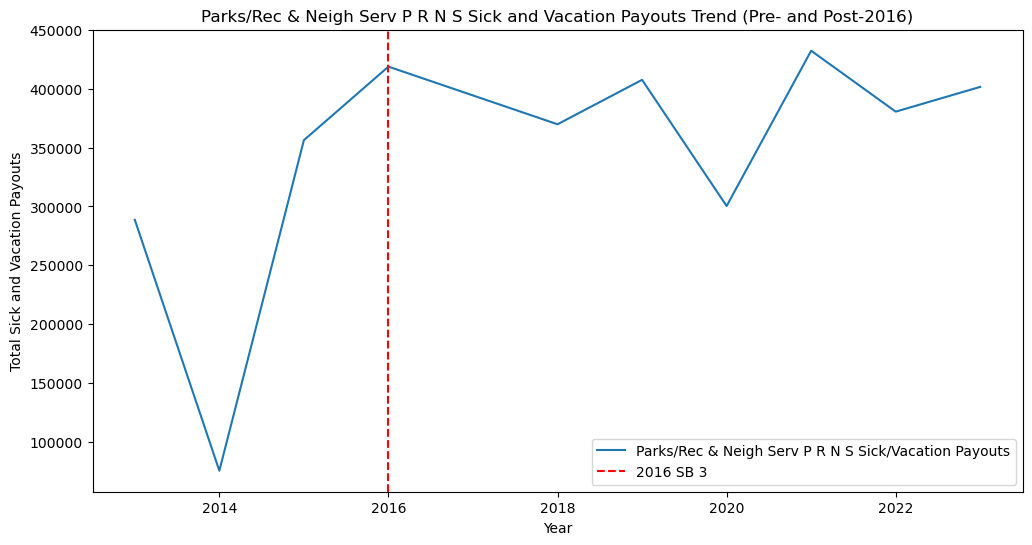

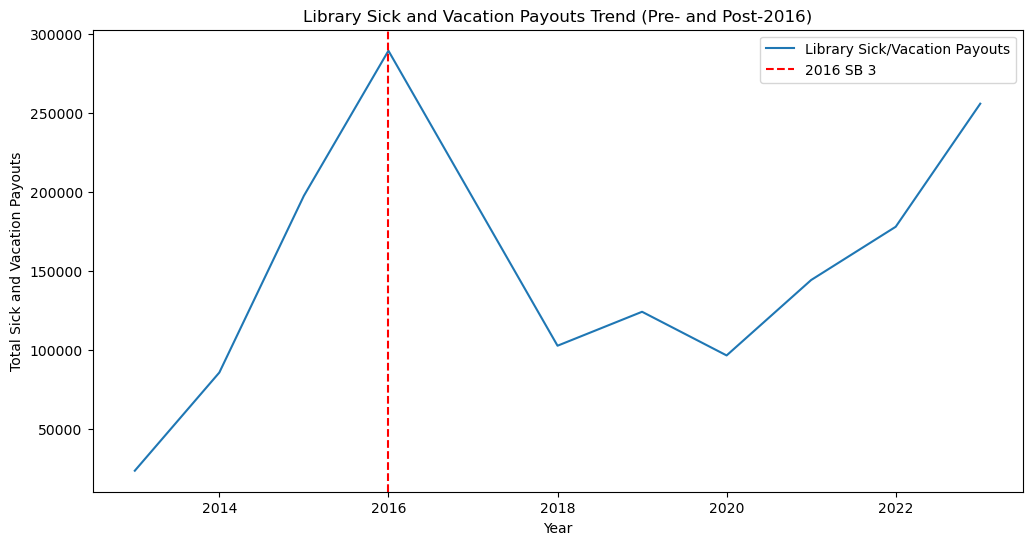

Text(0.5, 1.0, 'Correlation Between Compensation Metrics and Year')

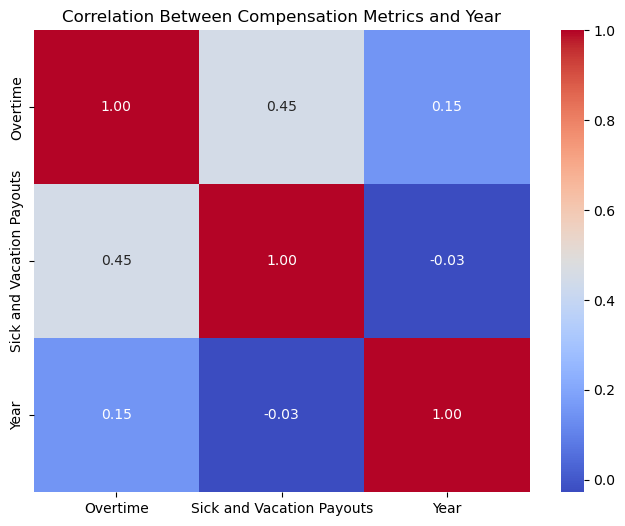

In [ ]:
df['Period'] = df['Year'].apply(lambda x: 'Pre-2016' if x < 2016 else 'Post-2016')
payouts_by_department = df.groupby(['Department', 'Period']).agg({'Sick and Vacation Payouts': 'mean'}).reset_index()

for dept, title in [(parks_rec, 'Parks/Rec & Neigh Serv P R N S'), (library, 'Library')]:
    dept_trend = dept.groupby('Year').agg({'Sick and Vacation Payouts': 'sum'}).reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=dept_trend, x='Year', y='Sick and Vacation Payouts', label=f'{title} Sick/Vacation Payouts')
    plt.axvline(2016, color='red', linestyle='--', label='2016 SB 3')
    plt.title(f'{title} Sick and Vacation Payouts Trend (Pre- and Post-2016)')
    plt.xlabel('Year')
    plt.ylabel('Total Sick and Vacation Payouts')
    plt.legend()
    plt.show()

correlation = df[['Overtime', 'Sick and Vacation Payouts', 'Year']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Compensation Metrics and Year')

In [44]:
transportation_dept = df[df['Department'] == 'Transportation']

transportation_dept['Period'] = transportation_dept['Year'].apply(lambda x: 'Pre-2020' if x < 2020 else 'Post-2020')

other_comp_trend = transportation_dept.groupby('Year').agg({'Other Cash Compensation': 'sum'}).reset_index()

/var/folders/fd/3bl_2gw53px8fzkn9hzfjt8c0000gn/T/ipykernel_11978/4370829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transportation_dept['Period'] = transportation_dept['Year'].apply(lambda x: 'Pre-2020' if x < 2020 else 'Post-2020')


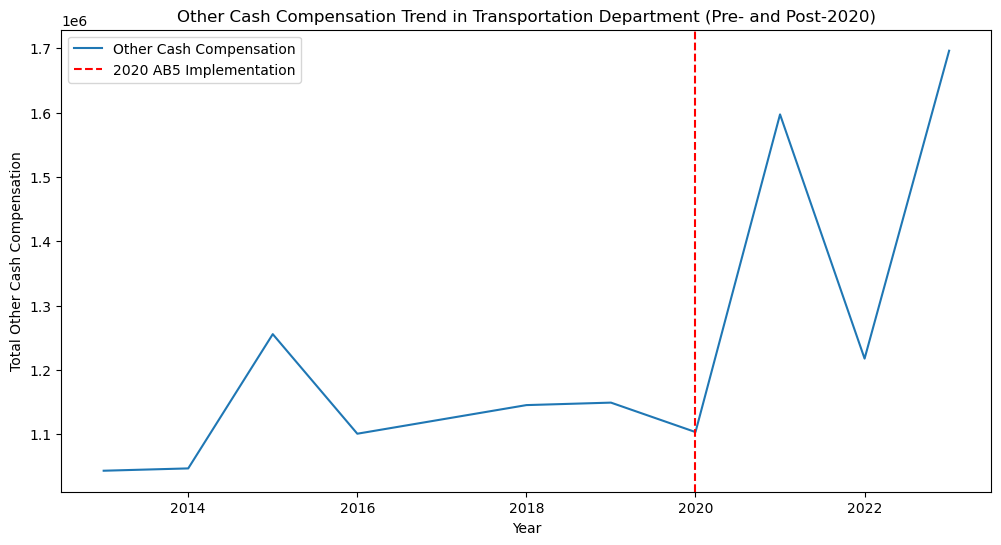

In [45]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=other_comp_trend, x='Year', y='Other Cash Compensation', label='Other Cash Compensation')
plt.axvline(2020, color='red', linestyle='--', label='2020 AB5 Implementation')
plt.title('Other Cash Compensation Trend in Transportation Department (Pre- and Post-2020)')
plt.xlabel('Year')
plt.ylabel('Total Other Cash Compensation')
plt.legend()
plt.show()

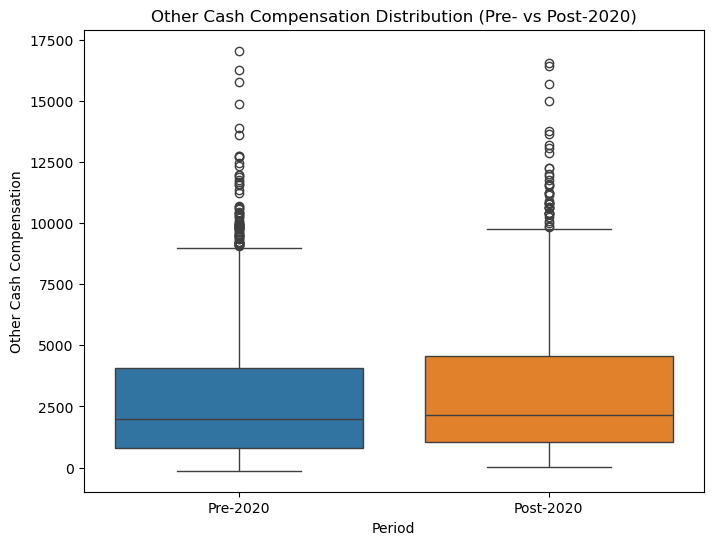

In [ ]:
filtered_transportation_dept = transportation_dept[transportation_dept['Other Cash Compensation'] <= 20000]

plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_transportation_dept, x='Period', y='Other Cash Compensation', hue='Period')
plt.title('Other Cash Compensation Distribution (Pre- vs Post-2020)')
plt.xlabel('Period')
plt.ylabel('Other Cash Compensation')
plt.show()

In [ ]:
transportation_dept['Employment Type'] = transportation_dept['Job Title'].apply(lambda x: 'Part-Time' if 'PT' in x else 'Full-Time')

employment_comp = transportation_dept.groupby(['Year', 'Employment Type']).agg({'Other Cash Compensation': 'sum'}).reset_index()

/var/folders/fd/3bl_2gw53px8fzkn9hzfjt8c0000gn/T/ipykernel_11978/1463230292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transportation_dept['Employment Type'] = transportation_dept['Job Title'].apply(lambda x: 'Part-Time' if 'PT' in x else 'Full-Time')


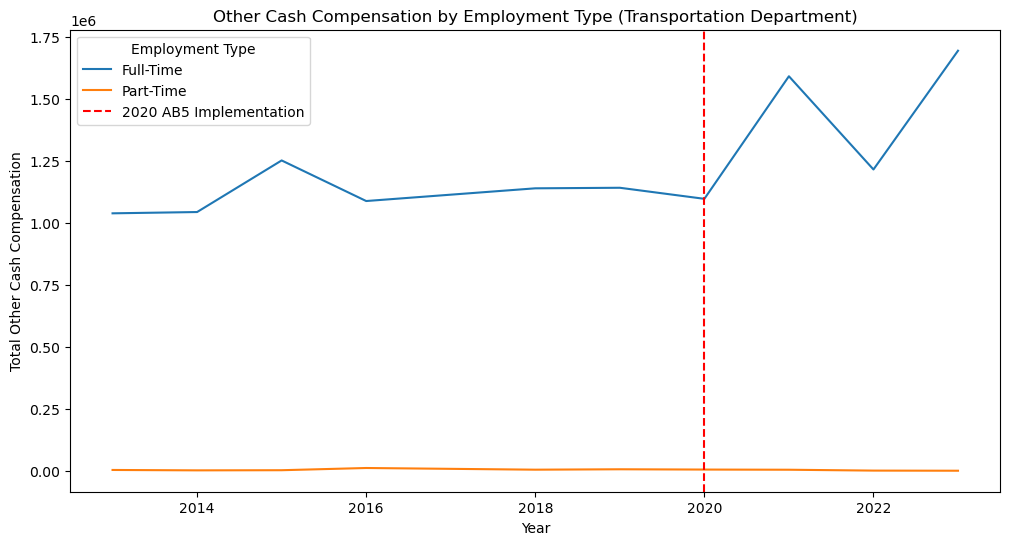

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=employment_comp, x='Year', y='Other Cash Compensation', hue='Employment Type')
plt.axvline(2020, color='red', linestyle='--', label='2020 AB5 Implementation')
plt.title('Other Cash Compensation by Employment Type (Transportation Department)')
plt.xlabel('Year')
plt.ylabel('Total Other Cash Compensation')
plt.legend(title='Employment Type')
plt.show()

/var/folders/fd/3bl_2gw53px8fzkn9hzfjt8c0000gn/T/ipykernel_11978/3295617549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transportation_dept['Period'] = transportation_dept['Year'].apply(lambda x: 'Pre-2020' if x < 2020 else 'Post-2020')


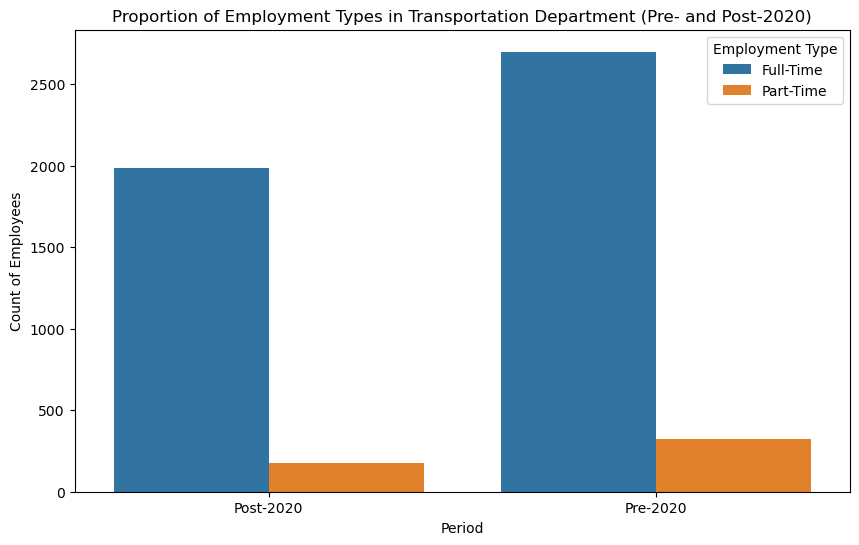

In [55]:
transportation_dept['Period'] = transportation_dept['Year'].apply(lambda x: 'Pre-2020' if x < 2020 else 'Post-2020')
employment_type_dist = transportation_dept.groupby(['Period', 'Employment Type']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=employment_type_dist, x='Period', y='Count', hue='Employment Type')
plt.title('Proportion of Employment Types in Transportation Department (Pre- and Post-2020)')
plt.xlabel('Period')
plt.ylabel('Count of Employees')
plt.legend(title='Employment Type')
plt.show()